# PREDICTING HOUSE PRICES USING LINEAR REGRESSION


## 1. WRANGLING


In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
train = pd.read_csv('data/train.csv')
train.shape
test = pd.read_csv('data/test.csv')
test.shape
# adding SalePrice column to test dataset for consistency
test['SalePrice'] = 0
frames = [train, test]
df = pd.concat(frames)
df.shape

(2919, 81)

 ## Handling Missing Data

In [71]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_df = pd.DataFrame(missing, columns = ['Missing'])
missing_table = missing_df[missing_df.Missing > 0 ]
missing_table.index
missing_table

,Missing
PoolQC,2909
MiscFeature,2814
Alley,2721
Fence,2348
FireplaceQu,1420
LotFrontage,486
GarageCond,159
GarageYrBlt,159
GarageFinish,159
GarageQual,159


In [72]:
df = df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1)
missing_table = missing_table.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=0)
df.shape

(2919, 76)

In [73]:
# I found out that some numerical features are actually really categories, after going through kaggle user juliencs' notebook
# https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset

df = df.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })
df['MSSubClass'] = df['MSSubClass'].astype('category')
df['MoSold'] = df['MoSold'].astype('category')

In [74]:
numeric = []
non_numeric = []
for missing in missing_table.index:
    if df[missing].dtype == np.object:
        non_numeric.append(missing)
    else:
        numeric.append(missing)
print ('Numeric Variables: ')
print (numeric)
print ('Non-Numeric Variables: ')
print(non_numeric)   

Numeric Variables: 
['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtHalfBath', 'BsmtFullBath', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'GarageArea', 'GarageCars', 'BsmtFinSF1']
Non-Numeric Variables: 
['GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType', 'MSZoning', 'Utilities', 'Functional', 'Exterior1st', 'KitchenQual', 'Exterior2nd', 'SaleType', 'Electrical']


In [75]:
for var in numeric:
    df[var] = df[var].fillna(0)

fill_with_no = ["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","GarageType","GarageFinish","GarageQual","GarageCond"]
for var in fill_with_no:
    df[var] = df[var].fillna("NA")

df["MasVnrType"] = df["MasVnrType"].fillna("None")

# No Absent Value for 'MSZoning so i'll go ahead to use the mode to replace all Nil values
fill_with_mode = ["MSZoning","Utilities","Functional","Exterior1st","KitchenQual","Exterior2nd","SaleType","Electrical","MSSubClass","MoSold"]
for var in fill_with_mode:
    df[var] = df[var].fillna(df[var].mode().iloc[0])

# Final check for missing data, should turn up nil
missing = df.isnull().sum().sort_values(ascending=False)
missing_df = pd.DataFrame(missing, columns = ['Missing'])
missing_df[missing_df.Missing > 0 ]

,Missing


CATEGORICAL (ORDINAL)

In [76]:
# Converting Ordinal Variables into a numerical scale

ordered_lotshape = ['IR3','IR2','IR1','Reg']
df['LotShape'] = df['LotShape'].astype("category",ordered=True,categories=ordered_lotshape).cat.codes

ordered_landcontour = ['Low','HLS','Bnk','Lvl']
df['LandContour'] = df['LandContour'].astype("category",ordered=True,categories=ordered_landcontour).cat.codes

ordered_exterqual = ['Po','Fa','TA','Gd','Ex']
df['ExterQual'] = df['ExterQual'].astype("category",ordered=True,categories=ordered_exterqual).cat.codes

ordered_extercond = ['Po','Fa','TA','Gd','Ex']
df['ExterCond'] = df['ExterCond'].astype("category",ordered=True,categories=ordered_extercond).cat.codes

ordered_bsmtqual = ['NA','Po','Fa','TA','Gd','Ex']
df['BsmtQual'] = df['BsmtQual'].astype("category",ordered=True,categories=ordered_bsmtqual).cat.codes

ordered_bsmtcond = ['NA','Po','Fa','TA','Gd','Ex']
df['BsmtCond'] = df['BsmtCond'].astype("category",ordered=True,categories=ordered_bsmtcond).cat.codes

ordered_bsmtexposure = ['NA','No','Mn','Av','Gd']
df['BsmtExposure'] = df['BsmtExposure'].astype("category",ordered=True,categories=ordered_bsmtexposure).cat.codes

ordered_bsmtfintype1 = ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ']
df['BsmtFinType1'] = df['BsmtFinType1'].astype("category",ordered=True,categories=ordered_bsmtfintype1).cat.codes

ordered_bsmtfintype2 = ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ']
df['BsmtFinType2'] = df['BsmtFinType2'].astype("category",ordered=True,categories=ordered_bsmtfintype2).cat.codes

ordered_heatingqc = ['Po','Fa','TA','Gd','Ex']
df['HeatingQC'] = df['HeatingQC'].astype("category",ordered=True,categories=ordered_heatingqc).cat.codes

ordered_kitchenqual = ['Po','Fa','TA','Gd','Ex']
df['KitchenQual'] = df['KitchenQual'].astype("category",ordered=True,categories=ordered_kitchenqual).cat.codes

ordered_functional = ['Sal','Sev','Maj1','Maj2','Mod','Min2','Min1','Typ']
df['Functional'] = df['Functional'].astype("category",ordered=True,categories=ordered_functional).cat.codes

ordered_garagefinish = ['NA','Unf','RFn','Fin']
df['GarageFinish'] = df['GarageFinish'].astype("category",ordered=True,categories=ordered_garagefinish).cat.codes

ordered_garagequal = ['NA','Po','Fa','TA','Gd','Ex']
df['GarageQual'] = df['GarageQual'].astype("category",ordered=True,categories=ordered_garagequal).cat.codes

ordered_garagecond = ['NA','Po','Fa','TA','Gd','Ex']
df['GarageCond'] = df['GarageCond'].astype("category",ordered=True,categories=ordered_garagecond).cat.codes

ordered_utilities = ['ELO','NoSeWa','NoSewr','AllPub']
df['Utilities'] = df['Utilities'].astype("category",ordered=True,categories=ordered_utilities).cat.codes

ordered_landslope = ['Sev','Mod','Gtl']
df['LandSlope'] = df['LandSlope'].astype("category",ordered=True,categories=ordered_landslope).cat.codes

ordered_electrical = ['Mix','FuseP','FuseF','FuseA','SBrkr']
df['Electrical'] = df['Electrical'].astype("category",ordered=True,categories=ordered_electrical).cat.codes

ordered_paveddrive = ['N','P','Y']
df['PavedDrive'] = df['PavedDrive'].astype("category",ordered=True,categories=ordered_paveddrive).cat.codes

df.shape

(2919, 76)

In [77]:
# check if we have int values in our newly converted variables
ordinal = ['Utilities','LandSlope','Electrical','LotShape','PavedDrive','LandContour','ExterQual','GarageCond','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','Functional','GarageFinish','GarageQual']
for var in ordinal:
    print(df[var].unique())

[3 1]
[2 1 0]
[4 2 3 1 0]
[3 2 1 0]
[2 0 1]
[3 2 0 1]
[3 2 4 1]
[3 2 0 4 1 5]
[2 3 1 0 4]
[4 3 5 0 2]
[3 4 0 2 1]
[1 4 2 3 0]
[6 5 1 3 4 0 2]
[1 4 0 5 3 2 6]
[4 3 2 1 0]
[3 2 4 1]
[7 6 2 5 4 3 1]
[2 1 3 0]
[3 2 4 0 5 1]


In [78]:
# Norminal Variables - MSZoning, Street, Alley, LotConfig, Neighborhood, Condition1, Condition2, BldgType, RoofStyle,
#                      HouseStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating, CentralAir, Electrical, GarageType
#                     PavedDrive, Fence, MiscFeature, SaleType, SaleCondition, 'Utilities','LandSlope'
category = ['MSZoning', 'Street',  'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'RoofStyle','HouseStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating', 'CentralAir',  'GarageType', 'SaleType', 'SaleCondition','MSSubClass','MoSold']
df_dummies = pd.get_dummies(df[category])
df = df.drop(df[category],axis=1)
df = pd.concat([df, df_dummies],axis=1)
df_dummies.shape


(2919, 180)

## Create New Features

In [79]:
# From our combined we get back our train & test datasets
train = df[:1460]
test = df[1460:]

## Target Variable

In [80]:
train['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In the Paper for this dataset the author pointed out a pitfall;


> Potential Pitfalls (Outliers): Although all known errors were corrected in the data, no observations have been removed due to unusual values and all final residential sales from the initial data set are included in the data presented with this article. There are five observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will quickly indicate these points). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). **I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these five unusual observations) before assigning it to students.**

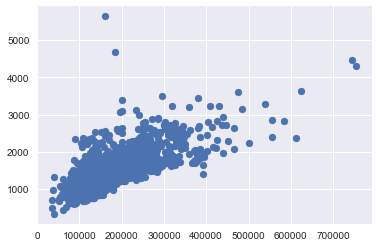

In [81]:
plt.scatter(train['SalePrice'],train['GrLivArea'])

In [82]:
# train = train.drop(train['GrlivArea']>4000,axis=0)
train = train.drop(train[train['GrLivArea'] >= 4000].index,axis=0)
train.shape

(1456, 235)

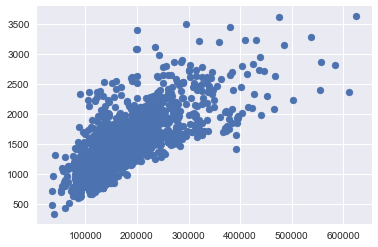

In [83]:
plt.scatter(train['SalePrice'],train['GrLivArea'])

In [84]:
train.head()

,Id,LotFrontage,LotArea,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep
0,1,65.0,8450,3,3,3,2,7,5,2003,...,0,1,0,0,0,0,0,0,0,0
1,2,80.0,9600,3,3,3,2,6,8,1976,...,0,0,0,0,0,0,1,0,0,0
2,3,68.0,11250,2,3,3,2,7,5,2001,...,0,0,0,0,0,0,0,0,0,1
3,4,60.0,9550,2,3,3,2,7,5,1915,...,0,1,0,0,0,0,0,0,0,0
4,5,84.0,14260,2,3,3,2,8,5,2000,...,1,0,0,0,0,0,0,0,0,0


In [85]:
test.tail()
print test.shape

(1459, 235)


## 3. MODEL SELECTION & TRAINING 


#### 3.2 Using all Features with Linear Regression

In [86]:
# import our linear model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt, log
# X is our Features.
X = train.drop(['SalePrice'],axis=1)
# Y is the target variable.
Y = train.SalePrice
lm = linear_model.LinearRegression()
lm.fit(X,Y)
# predictions = lm.predict(X)

train_prediction = lm.predict(X)
print("Root Mean squared error: %.2f" % sqrt(mean_squared_error((Y), train_prediction)))
print(lm.score(X,Y))


Root Mean squared error: 20751.24
0.926745497652


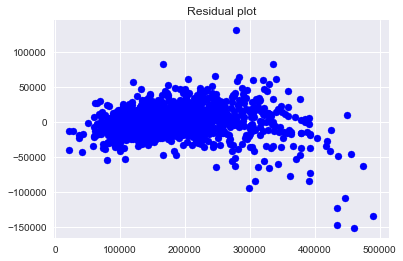

In [87]:
# test = test.drop(['SalePrice'],axis=1)
train_prediction = lm.predict(X)
pred = pd.DataFrame(abs(train_prediction))
plt.scatter(train_prediction, (train_prediction - Y), c='b')
plt.title('Residual plot')

In [88]:
# sns.distplot(train_prediction-Y)

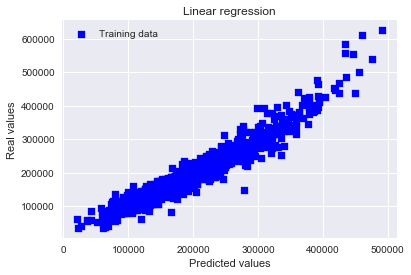

In [89]:
plt.scatter(pred, Y, c = "blue", marker = "s", label = "Training data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.show()

In [90]:
test = test.drop(['SalePrice'],axis=1)
test_prediction = lm.predict(test)
test_pred = pd.DataFrame(abs(test_prediction))
ID = pd.DataFrame(test['Id'])
pred = ID.join(test_pred)
pred.to_csv('submission.csv', header=['Id','SalePrice'],index=False)

#### 3.2 Linear Regression with Recursive Feature Elimination

In [91]:
from sklearn import linear_model
from sklearn.feature_selection import RFE

X = train.drop(['SalePrice'],axis=1)
Y = train.SalePrice

lm = linear_model.LinearRegression()
rfe = RFE(lm, n_features_to_select=150)
rfe = rfe.fit(X,Y) 
rfe_score = rfe.score(X,Y)
rfe_score


0.84679985761288368

In [93]:
test_rfe = test
test_prediction_rfe = rfe.predict(test)
test_pred_rfe = pd.DataFrame(abs(test_prediction_rfe))
ID = pd.DataFrame(test['Id'])
pred = ID.join(test_pred_rfe)
pred.to_csv('rfe_submission.csv', header=['Id','SalePrice'],index=False)

#### 3.3 Linear Regression with Ridge regularization (L2 penalty)

In [95]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X, Y)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], cv = 10)
ridge.fit(X, Y)
alpha = ridge.alpha_
print("Best alpha :", alpha)
train_prediction = ridge.predict(X)
print("Root Mean squared error: %.2f" % sqrt(mean_squared_error((Y), train_prediction)))



('Best alpha :', 10.0)
Try again for more precision with alphas centered around 10.0
('Best alpha :', 14.0)
Root Mean squared error: 21449.38


In [96]:
test_ridge = test
test_prediction_ridge = ridge.predict(test)
test_pred_ridge = pd.DataFrame(abs(test_prediction_ridge))
ID = pd.DataFrame(test['Id'])
pred = ID.join(test_pred_ridge)
pred.to_csv('ridge_submission.csv', header=['Id','SalePrice'],index=False)